# Multi-Layer Perceptron

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torchvision.io import read_image
from torch import nn, optim
from matplotlib import cm
from matplotlib import style
%matplotlib widget
style.use('default')
#https://www.pluralsight.com/guides/building-your-first-pytorch-solution

## Data normalization

In [2]:
img_size = 227

#transform = transforms.Compose([transforms.ToTensor(),
#                                transforms.Resize((img_size, img_size)),
#                                transforms.Normalize((0.5,), (0.5,))])

#No normalization as document says.
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((img_size, img_size))])

In [3]:
#Code just to ease the load from local folder
import os
print(os.listdir("."))

from os import walk
for (dirpath, dirnames, filenames) in walk("."):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
#     print("File name: ", filenames)

['dataset_train_test', 'dataset_train_test.zip', 'PAPILA_dataset.pdf', 'Readme.txt', 'Tests.docx', 'TP1 - Newton-Rhapson.ipynb', 'TP1 - Optimizacion de Funciones.ipynb', 'TP1 - Perceptron multi-capa - propEntregable.ipynb', 'TP1 - Perceptron multi-capa.ipynb', 'TP_1_Optimizacion_Redes_Neuronales.lyx', 'TP_1_Optimizacion_Redes_Neuronales.lyx~', 'TP_1_Optimizacion_Redes_Neuronales.pdf']
Directory path:  .
Folder name:  ['dataset_train_test']
Directory path:  .\dataset_train_test
Folder name:  ['dataset_train_test']
Directory path:  .\dataset_train_test\dataset_train_test
Folder name:  ['test', 'train']
Directory path:  .\dataset_train_test\dataset_train_test\test
Folder name:  ['0', '1']
Directory path:  .\dataset_train_test\dataset_train_test\test\0
Folder name:  []
Directory path:  .\dataset_train_test\dataset_train_test\test\1
Folder name:  []
Directory path:  .\dataset_train_test\dataset_train_test\train
Folder name:  ['0', '1']
Directory path:  .\dataset_train_test\dataset_train_tes

## Loading data

torch.Size([32, 3, 227, 227])


C:\Users\jcord\AppData\Local\Temp\ipykernel_23356\3510772727.py:31: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2985.)
  axs[0,0].imshow(images[0].T.numpy().squeeze(), cmap='gray_r')


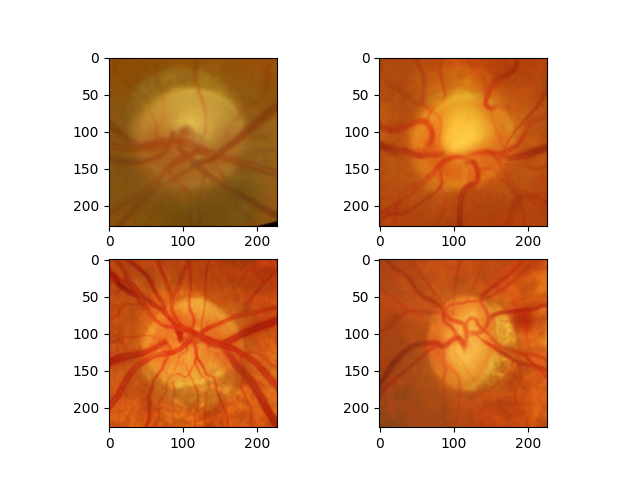

In [4]:
%matplotlib widget
#def load_test_train_data_MNIST():
#    trainset = datasets.MNIST(r'..\input\MNIST', download=True, train=True, transform=transform)
#    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#    testset = datasets.MNIST(r'..\input\MNIST', download=True, train=False, transform=transform)
#    testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
#    return trainloader, testloader

from locale import normalize

from matplotlib.pyplot import imshow


def load_test_train_data_tp1():
    trainset = torchvision.datasets.ImageFolder(r'.\dataset_train_test\dataset_train_test\train',transform = transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

    testset = torchvision.datasets.ImageFolder(r'.\dataset_train_test\dataset_train_test\test',transform = transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)
    return trainloader, testloader

trainloader, testloader = load_test_train_data_tp1()
dataiter = iter(trainloader) # creating a iterator
images, labels = dataiter.next() # creating images for image and lables for image number (0 to 9) 

print(images.mT.shape)
#plt.imshow(images[0].T.numpy().squeeze(), cmap='gray_r');

fig, axs = plt.subplots(2,2)
axs[0,0].imshow(images[0].T.numpy().squeeze(), cmap='gray_r')
axs[0,1].imshow(images[1].T.numpy().squeeze(), cmap='gray_r')
axs[1,0].imshow(images[2].T.numpy().squeeze(), cmap='gray_r')
axs[1,1].imshow(images[3].T.numpy().squeeze(), cmap='gray_r')


#  3. (40 puntos) Redes convolucionales para detección de glaucoma en imágenes de fondo de ojo.

## 3.1. (20 puntos) Implemente el filtro de «Unsharp masking» para la mejora de las imágenes, según lo especificado en el material del curso.
   
<br>

<div style="text-align: justify; font-size:15px">    

Text

</div>

torch.Size([3, 227, 227])


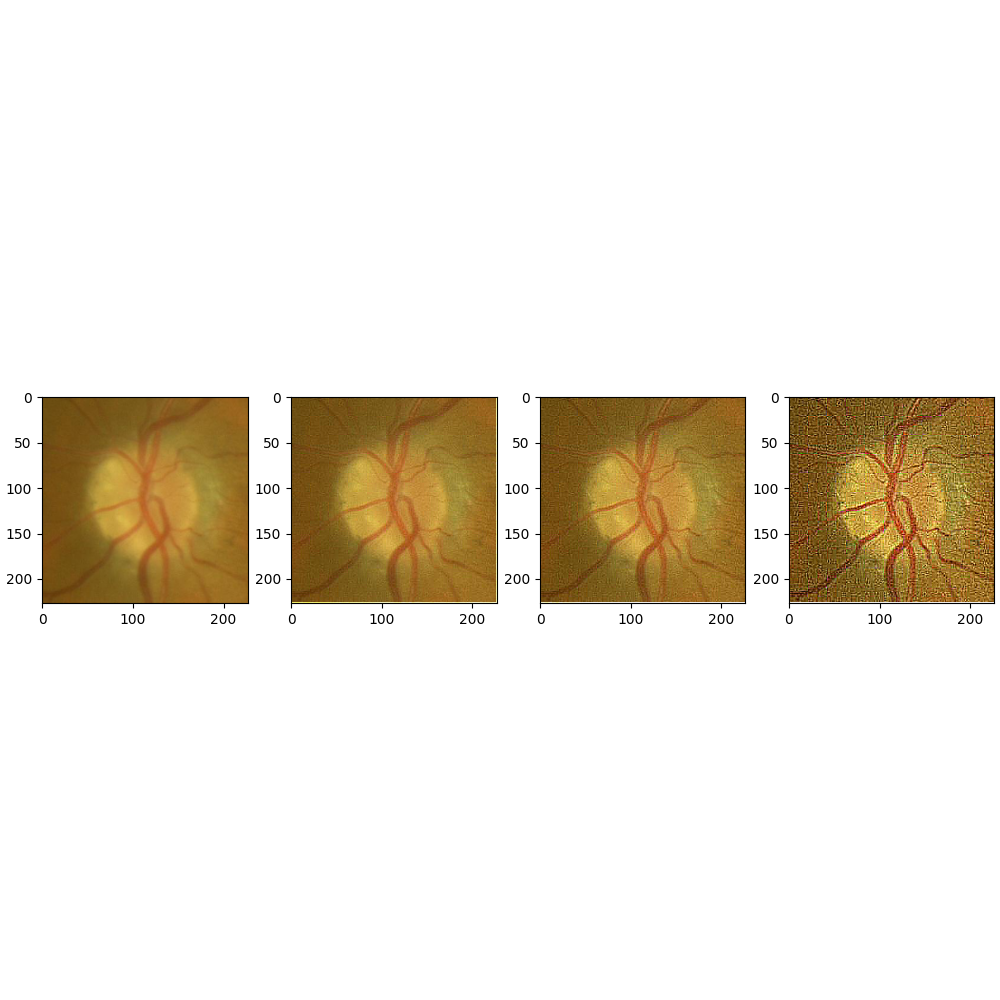

In [12]:
#Punto 3.1 del TP01
#Gaussian blur filter
def gaussian_blur():
    #Gaussian blur filter
    F = torch.tensor([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]]).float()
    return F

### Convlution for unsharp masking
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

#Manual convlution method for 3 channel images.
def convolution(U,F):

    new_size = calculate_target_size(img_size=U.shape[1],kernel_size=U.shape[0])

    kernel=F

    kernel_shape = kernel.shape[0]

    conv_img = torch.zeros(3,new_size,new_size)
    
    for g in range(3):
        for i in range(new_size):
            for j in range(new_size):
                mat = U[g,i:i+kernel_shape,j:j+kernel_shape]
                conv_img[g, i, j] = torch.sum(torch.multiply(mat,kernel))

    #Add padding to the convuluted image so the size is the same for original and convoluted image.
    conv_img=torchvision.transforms.Pad(1)(conv_img)
    
    return conv_img

def unsharp_masking(U,amount):
    return U + (U-convolution(U,gaussian_blur())) * amount

U = read_image(r'.\dataset_train_test\dataset_train_test\train\0\Im106_ACRIMA.jpg') / 255
U=torchvision.transforms.Resize(227)(U)
print(U.shape)

def disp(x): return (x.clamp(0,1) * 255).byte().permute(1,2,0).cpu()

fig, (ax, bx, cx, dx) = plt.subplots(1,4, figsize=(10,10),label="Convolution test")
ax.imshow(disp(U))
bx.imshow(disp(unsharp_masking(U,5)))
cx.imshow(disp(unsharp_masking(U,10)))
dx.imshow(disp(unsharp_masking(U,40)))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


In [9]:
def create_MLP_model():
    # Model creation with neural net Sequential model
    model=nn.Sequential(nn.Linear(227*227*3,128), # 1 layer:- 784 input 128 o/p
                        #nn.Tanh(),
                        #nn.ReLU(),          # Defining Regular linear unit as activation
                        nn.Sigmoid(),
                        nn.Linear(128,64),  # 2 Layer:- 128 Input and 64 O/p
                        #nn.Tanh(),          # Defining Regular linear unit as activation
                        nn.Sigmoid(),
                        #nn.ReLU(),
                        nn.Linear(64,2),   # 3 Layer:- 64 Input and 10 O/P as (0-9)
                        nn.LogSoftmax(dim=1) # Defining the log softmax to find the probablities for the last output unit
                      ) 
    return model

def create_AlexNet_model():
    class AlexNet(nn.Module):
        def __init__(self):
            super(AlexNet, self).__init__()

            self.layer1 = nn.Sequential(
                nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
                nn.BatchNorm2d(96),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 3, stride = 2))
            self.layer2 = nn.Sequential(
                nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
                nn.BatchNorm2d(256),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 3, stride = 2))
            self.layer3 = nn.Sequential(
                nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(384),
                nn.ReLU())
            self.layer4 = nn.Sequential(
                nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(384),
                nn.ReLU())
            self.layer5 = nn.Sequential(
                nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(256),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 3, stride = 2))
            self.fc = nn.Sequential(
                nn.Dropout(0.5),
                nn.Linear(9216, 4096),
                nn.ReLU())
            self.fc1 = nn.Sequential(
                nn.Dropout(0.5),
                nn.Linear(4096, 4096),
                nn.ReLU())
            self.fc2= nn.Sequential(
                nn.Linear(4096, 2),nn.LogSoftmax(dim=1))
                #nn.Linear(4096, 2),nn.Softmax(dim=1))

        def forward(self, x):
            out = self.layer1(x)
            out = self.layer2(out)
            out = self.layer3(out)
            out = self.layer4(out)
            out = self.layer5(out)
            out = out.reshape(out.size(0), -1)
            out = self.fc(out)
            out = self.fc1(out)
            out = self.fc2(out)
            return out
 
    cnn = AlexNet()
    return cnn

    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Running on device: ", device)
mlp_model = create_MLP_model()

#moving models to device
mlp_model.to(device)
cnn_model = create_AlexNet_model()
cnn_model.to(device)
#error function
criterion = nn.NLLLoss() 
print("MLP model")
print(mlp_model)
print("CNN model ")
print(cnn_model)

Running on device:  cuda
MLP model
Sequential(
  (0): Linear(in_features=154587, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Sigmoid()
  (4): ReLU()
  (5): Linear(in_features=64, out_features=2, bias=True)
  (6): LogSoftmax(dim=1)
)
CNN model 
AlexNet(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): B

In [10]:
def train_model(model, criterion, epochs = 15, lr = 0.01, is_MLP = False):

    time0 = time()    
    running_loss_list= []
    epochs_list = []
    optimizer = optim.SGD(model.parameters(), lr= lr, momentum=0.9)
    for e in range(epochs):
        running_loss = 0
        
        #go for every batch
        for images, labels in trainloader:
            #move data to specific device
            images = images.to(device)
            labels = labels.to(device)
            # Flatenning MNIST images with size [64,784] (for MLP)
            if(is_MLP):
              images = images.view(images.shape[0], -1) 
            
            # defining gradient in each epoch as 0
            optimizer.zero_grad()            
            # modeling for each image batch
            output = model(images)

            # calculating the loss
            loss = criterion(output, labels)

            # This is where the model learns by backpropagating
            loss.backward()

            # And optimizes its weights here
            optimizer.step()

            # calculating the loss
            running_loss += loss.item()

        else:
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
    print("\nTraining Time (in minutes) =",(time()-time0)/60)
    return model


print("Training CNN model")
cnn_model = train_model(cnn_model, criterion, epochs = 15, lr = 0.03, is_MLP = False)

print("Training MLP model")
mlp_model = train_model(mlp_model, criterion, epochs = 15, lr = 0.03, is_MLP = True)

Training CNN model
Epoch 0 - Training loss: 0.9233216065913439
Epoch 1 - Training loss: 0.400812148116529
Epoch 2 - Training loss: 0.5590672423131764
Epoch 3 - Training loss: 0.3301512380130589
Epoch 4 - Training loss: 0.46310182427987456
Epoch 5 - Training loss: 0.4535754262469709
Epoch 6 - Training loss: 0.371180921792984
Epoch 7 - Training loss: 0.22346469503827393
Epoch 8 - Training loss: 0.23155626095831394
Epoch 9 - Training loss: 0.16383420187048614
Epoch 10 - Training loss: 0.17987502622418106
Epoch 11 - Training loss: 0.23741196375340223
Epoch 12 - Training loss: 0.1654174157883972
Epoch 13 - Training loss: 0.15128323063254356
Epoch 14 - Training loss: 0.1730905284639448

Training Time (in minutes) = 0.6864151080449422
Training MLP model
Epoch 0 - Training loss: 0.7005067393183708
Epoch 1 - Training loss: 0.6027873829007149
Epoch 2 - Training loss: 0.5428203567862511
Epoch 3 - Training loss: 0.4895659666508436
Epoch 4 - Training loss: 0.4285310320556164
Epoch 5 - Training loss

In [30]:
def test_model_mlp(testloader, model):
    correct_count, all_count, false_positive = 0, 0, 0
    for images,labels in testloader:
      #move data to specific device
      images = images.to(device)
      labels = labels.to(device)
      for i in range(len(labels)):
        img = images[i].view(1, 227*227*3)
        #evaluate model with no grad
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        #get predicted label
        pred_label = probab.index(max(probab))
        true_label = labels.cpu().numpy()[i]
        if(true_label == pred_label):
          correct_count += 1
        else:
          if(true_label==0):
            false_positive += 1
        all_count += 1

    print("\nMLP Results")
    print("Number Of Images Tested =", all_count)
    print("Number Of Correct Tests =", correct_count)
    print("Number Of Incorrect Tests =", all_count - correct_count)
    print("Number Of False Positive Tests =", false_positive)
    print("Number Of False Negative Tests =", (all_count - correct_count) - false_positive)
    print("\nModel Accuracy =", (correct_count/all_count))

def test_model_cnn(testloader, model):
  correct_count, all_count, false_positive = 0, 0, 0
  for images,labels in testloader:
    #move data to specific device
    images = images.to(device)
    labels = labels.to(device)
    #get model output
    with torch.no_grad():
      outputs = model(images)
    for i in range(len(labels)):
      #apply exp as the activation function has the log
      output_observation = torch.exp(outputs[i, :])
      #get predicted label
      output_observation_np = list(output_observation.cpu().numpy())
      pred_label = output_observation_np.index(max(output_observation_np))
      #get the label
      true_label = labels.cpu().numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      else:
        if(true_label==0):
            false_positive += 1
      all_count += 1   

  print("\nAlexNet Results")
  print("Number Of Images Tested =", all_count)
  print("Number Of Correct Tests =", correct_count)
  print("Number Of Incorrect Tests =", all_count - correct_count)
  print("Number Of False Positive Tests =", false_positive)
  print("Number Of False Negative Tests =", (all_count - correct_count) - false_positive)
  print("\nModel Accuracy =", (correct_count/all_count))

print("\nTesing CNN model")
test_model_cnn(testloader, cnn_model)
print("\nTesting MLP model")
test_model_mlp(testloader, mlp_model)


Tesing CNN model

AlexNet Results
Number Of Images Tested = 210
Number Of Correct Tests = 193
Number Of Incorrect Tests = 17
Number Of False Positive Tests = 7
Number Of False Negative Tests = 10

Model Accuracy = 0.919047619047619

Testing MLP model

MLP Results
Number Of Images Tested = 210
Number Of Correct Tests = 160
Number Of Incorrect Tests = 50
Number Of False Positive Tests = 48
Number Of False Negative Tests = 2

Model Accuracy = 0.7619047619047619
